In [103]:
import pandas as pd
import numpy as np


In [104]:
data=pd.read_csv("mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [105]:
data["cap-shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [106]:
data["cap-surface"].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

In [107]:
import matplotlib.pyplot as plt
classes=data["class"].value_counts()
classes

class
e    4208
p    3916
Name: count, dtype: int64

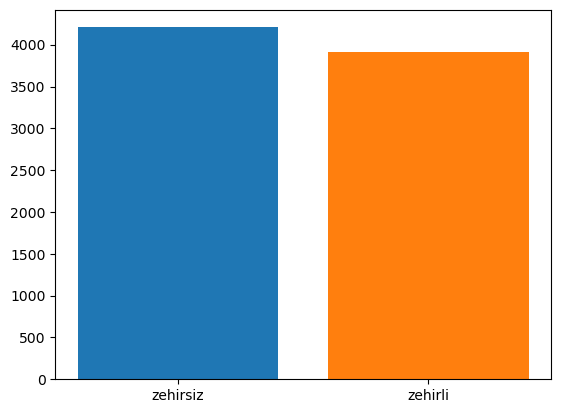

In [108]:
plt.bar("zehirsiz",classes[0])
plt.bar("zehirli",classes[1])
plt.show()

In [109]:

data=data.loc[:,["cap-shape","cap-color","ring-number","ring-type","class"]]


In [110]:
from sklearn.preprocessing import LabelEncoder
cevir =LabelEncoder()
for x in data.columns:
    data[x]=cevir.fit_transform(data[x])

In [111]:
data

,cap-shape,cap-color,ring-number,ring-type,class
0,5,4,1,4,1
1,5,9,1,4,0
2,0,8,1,4,0
3,5,8,1,4,1
4,5,3,1,0,0
...,...,...,...,...,...
8119,3,4,1,4,0
8120,5,4,1,4,0
8121,2,4,1,4,0
8122,3,4,1,0,1


In [112]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3)

In [113]:
trainx=train.drop("class",axis=1)
trainy=train.loc[:,"class"]

In [114]:
testx=test.drop("class",axis=1)
testy=test.loc[:,"class"]

In [115]:
trainx

,cap-shape,cap-color,ring-number,ring-type
3421,5,3,1,4
8117,3,2,1,0
1020,2,4,1,0
1735,5,4,1,0
4854,5,9,1,2
...,...,...,...,...
2373,5,4,1,4
4439,5,9,1,2
2202,2,4,1,4
6946,5,2,1,0


In [116]:
testx

,cap-shape,cap-color,ring-number,ring-type
3234,5,3,1,4
5388,2,3,1,4
6157,5,2,1,0
1128,5,8,1,0
4561,2,3,1,2
...,...,...,...,...
4793,2,9,1,2
8106,3,4,1,4
7438,3,4,1,0
793,5,9,1,4


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB


In [138]:
logistic=LogisticRegression()
logistic.fit(trainx,trainy)

LogisticRegression()

In [139]:
logisticTahminler=logistic.predict(testx)

In [140]:
linearSvc=LinearSVC()
linearSvc.fit(trainx,trainy)
tahminlerSvc=linearSvc.predict(testx)

/home/eray/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/eray/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [141]:
tree=DecisionTreeClassifier()
tree.fit(trainx,trainy)
tahminlerTree=tree.predict(testx)

In [148]:
ridge=RidgeClassifier()
ridge.fit(trainx,trainy)
tahminlerRidge=ridge.predict(testx)

In [143]:
gaussian=GaussianNB()
gaussian.fit(trainx,trainy)
tahminlerGaussian=gaussian.predict(testx)

In [144]:
from sklearn.metrics import classification_report,confusion_matrix

In [145]:
print("logistic \n",classification_report(testy,logisticTahminler))


logistic 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1269
           1       0.79      0.80      0.79      1169

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438



In [146]:
print("guassian \n",classification_report(testy,tahminlerGaussian))


guassian 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1269
           1       0.79      0.80      0.80      1169

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438



In [149]:
print("ridge \n",classification_report(testy,tahminlerRidge))


ridge 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1269
           1       0.79      0.80      0.79      1169

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438



In [152]:
print("guassian \n",classification_report(testy,tahminlerGaussian))


guassian 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1269
           1       0.79      0.80      0.80      1169

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438



In [150]:
print("SVC \n",classification_report(testy,tahminlerSvc))


SVC 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1269
           1       0.79      0.80      0.79      1169

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438



In [151]:
print("tree \n",classification_report(testy,tahminlerTree))


tree 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1269
           1       0.88      0.92      0.90      1169

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438



In [153]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(trainx,trainy)
tahminlerRandom=random.predict(testx)
print("random \n",classification_report(testy,tahminlerRandom))


random 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1269
           1       0.88      0.92      0.90      1169

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438

